<a href="https://colab.research.google.com/github/Ramon-Goveia/DataScience/blob/master/MLsaude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Análise de Dados Multifacetada da Saúde: Exploração, Visualização e Previsão da Pressão Sanguínea com Machine Learning.


Esse projeto abrange uma análise completa de dados de saúde, desde a exploração inicial até a construção de um modelo de machine learning para prever a pressão sanguínea. Utilizando Python e bibliotecas como pandas, seaborn e scikit-learn, o código realiza limpeza, exploração e visualizações avançadas. Além disso, inclui a aplicação de uma transformação logarítmica, análises estatísticas por gênero e a criação de gráficos complexos. A modelagem de machine learning é realizada com um modelo de regressão linear, cujos resultados são avaliados e persistidos para uso futuro, incluindo uma visualização do boxplot e o modelo treinado.

O código abaixo gera dados fictícios relacionados à saúde, incluindo informações como idade, gênero, altura, peso, pressão, colesterol, hábito de fumar, prática de exercícios, diabetes, IMC e categoria de IMC. Esses dados são salvos em um arquivo CSV chamado 'dados_saude.csv'.

In [12]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 500

df = pd.DataFrame({
'idade': np.random.normal(40, 5, n).astype(int),
'genero': np.random.choice(['masc', 'fem'], n),
'altura': np.random.normal(1.70, 0.1, n).round(2),
'peso': np.random.normal(70, 15, n).round(2),
'pressao': np.random.normal(120, 5, n).astype(int),
'colesterol': np.random.normal(200, 25, n).round(2),
'fumante': np.random.choice([0, 1], n),
'exercicio': np.random.choice([0, 1], n),
'diabetes': np.random.choice([0, 1], n)
})

df['imc'] = df['peso'] / (df['altura']**2)

df['categoria_imc'] = pd.cut(df['imc'], bins=[0, 18.5, 25, 30, 100], labels=['baixo', 'normal', 'sobrepeso', 'obeso'])

df.to_csv('dados_saude.csv', index=False)

O código abaixo realiza uma análise abrangente de dados, incorporando técnicas de exploração, visualização e modelagem de machine learning. Aqui está uma descrição mais detalhada:

Exploração e Limpeza de Dados:

O código inicia exibindo informações do DataFrame (df.info()) e um resumo estatístico descritivo (df.describe()), fornecendo uma visão geral das características e distribuição dos dados.
Análise Exploratória dos Dados (EDA):

Utilizando as bibliotecas seaborn e matplotlib, o código cria um pairplot para visualizar as relações entre variáveis-chave (idade, peso, altura e IMC) e um mapa de calor (heatmap) para avaliar as correlações entre essas variáveis e a pressão sanguínea.
Agregações e Transformações de Dados:

O código realiza agregações estatísticas, calculando a média e o máximo da idade agrupados por gênero (df.groupby('genero').agg({'idade': ['mean', 'max']})). Além disso, é introduzida uma transformação logarítmica no IMC, armazenando o resultado na coluna 'imc_log'.
Visualizações Avançadas:

Utilizando seaborn, são criados gráficos mais complexos. Um boxplot compara o peso entre diferentes gêneros, destacando a influência do hábito de fumar. Outro gráfico linear exibe a relação entre idade e níveis de colesterol, com distinção pelo status de diabetes.
Modelagem de Machine Learning:

A biblioteca scikit-learn é empregada para preparar os dados, dividir o conjunto em treinamento e teste, treinar um modelo de regressão linear e avaliar seu desempenho. As métricas de desempenho, como coeficientes do modelo e erro quadrático médio, são exibidas para análise.
Persistência de Resultados:

Finalmente, os resultados são salvos para referência futura. Uma visualização do boxplot é armazenada em um arquivo PNG chamado 'boxplot.png', enquanto o modelo de regressão linear é salvo usando o joblib com o nome 'modelo_pressao.joblib'.

Em suma, o código oferece uma abordagem completa e organizada para explorar dados de saúde, visualizar padrões e tendências, e construir um modelo de machine learning para prever a pressão sanguínea, tudo isso seguido por uma persistência dos resultados para uso posterior.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   idade          500 non-null    int64   
 1   genero         500 non-null    object  
 2   altura         500 non-null    float64 
 3   peso           500 non-null    float64 
 4   pressao        500 non-null    int64   
 5   colesterol     500 non-null    float64 
 6   fumante        500 non-null    int64   
 7   exercicio      500 non-null    int64   
 8   diabetes       500 non-null    int64   
 9   imc            500 non-null    float64 
 10  categoria_imc  500 non-null    category
dtypes: category(1), float64(4), int64(5), object(1)
memory usage: 39.9+ KB


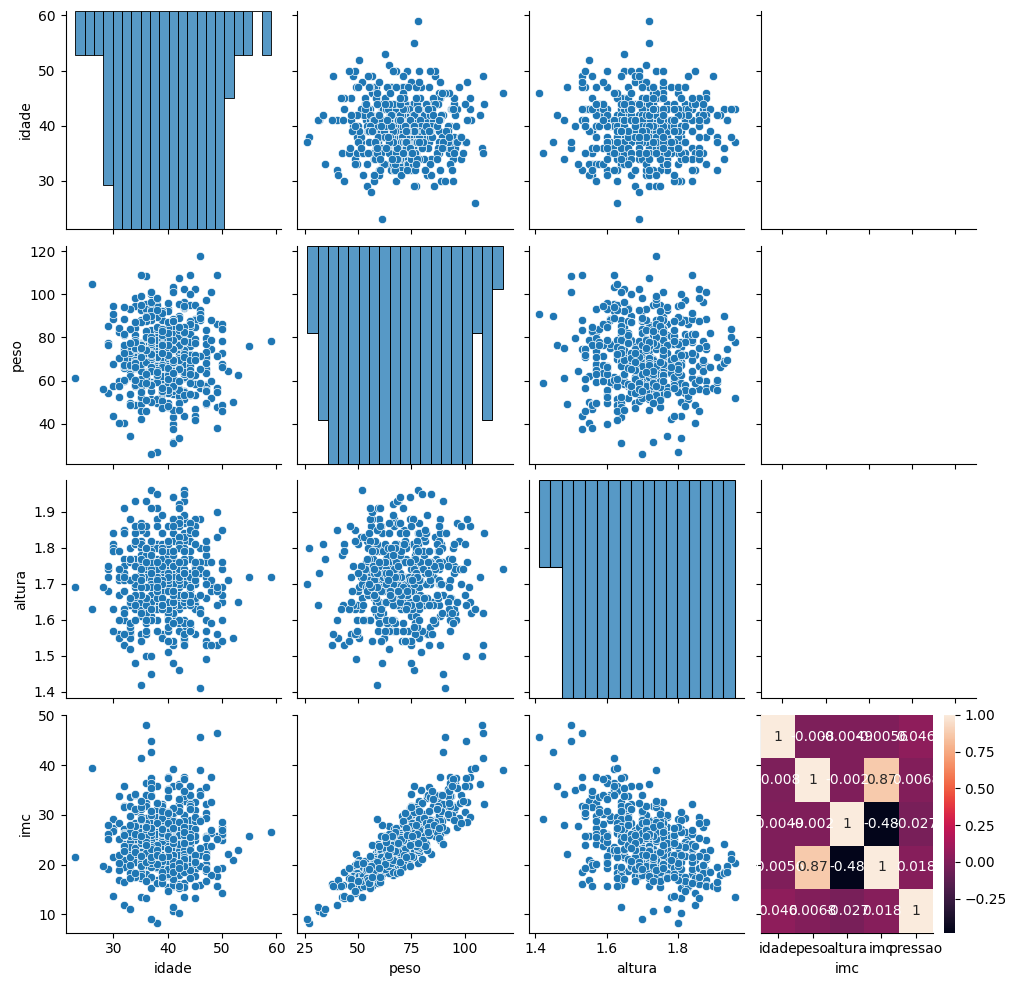

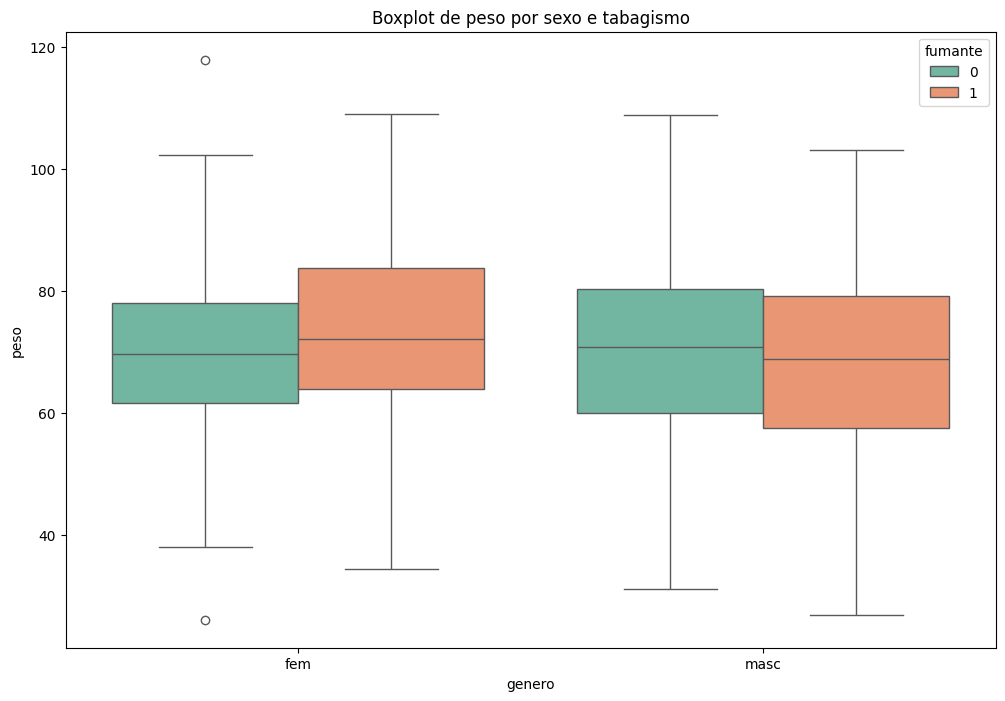

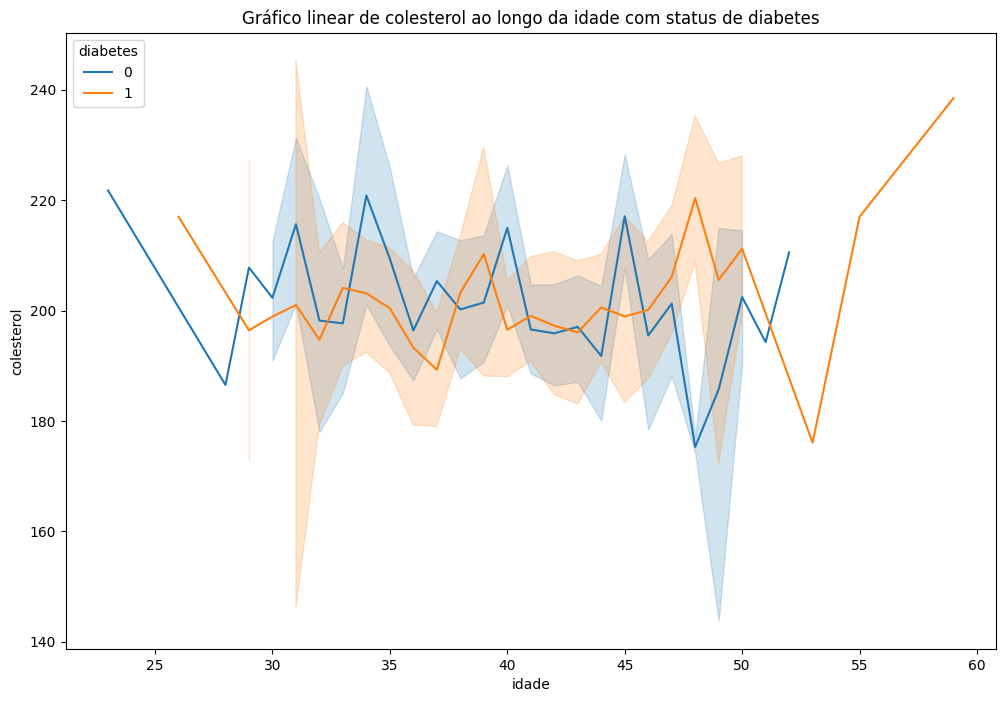

Coeficientes: [ 0.02719812 -0.00330706 -1.25579496  0.07064527 -0.07064527 -0.23471819
  0.23471819]
Erro quadrático médio: 4.422870320989528


['modelo_pressao.joblib']

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib  # Use joblib para persistência de modelo

# Explorar e limpar os dados
df.info()
df.describe()

# Análise exploratória dos dados
sns.pairplot(df[['idade', 'peso', 'altura', 'imc']])
sns.heatmap(df[['idade', 'peso', 'altura', 'imc', 'pressao']].corr(), annot=True)

# Agregações e transformações
df_agg = df.groupby('genero').agg({'idade': ['mean', 'max']})
df['imc_log'] = np.log(df['imc'])

# Visualizações avançadas
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df, x='genero', y='peso', hue='fumante', palette='Set2')
plt.title('Boxplot de peso por sexo e tabagismo')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=df, x='idade', y='colesterol', hue='diabetes')
plt.title('Gráfico linear de colesterol ao longo da idade com status de diabetes')
plt.show()

# Modelos de Machine Learning
X = pd.get_dummies(df[['idade', 'peso', 'altura', 'genero', 'fumante']], columns=['genero', 'fumante'])
y = df['pressao']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Coeficientes:', lr.coef_)
print('Erro quadrático médio:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Salvar resultado
fig.savefig('boxplot.png')
joblib.dump(lr, 'modelo_pressao.joblib')

DataFrame:

O DataFrame possui 500 entradas e 11 colunas, incluindo variáveis como idade, gênero, altura, peso, pressão, colesterol, hábito de fumar, prática de exercícios, diabetes, IMC e a categoria do IMC. Não há valores nulos em nenhumas das colunas.

Coeficientes do Modelo (Linear Regression):

Os coeficientes fornecem a contribuição relativa de cada variável na predição da pressão sanguínea. Os coeficientes negativos e positivos indicam a direção da relação entre a variável correspondente e a pressão sanguínea. Por exemplo, coeficientes negativos indicam uma relação inversa.

Erro Quadrático Médio:

O erro quadrático médio (RMSE) é uma métrica que avalia o quão bem o modelo está se saindo na previsão da pressão sanguínea. Quanto menor o RMSE, melhor o desempenho do modelo. Neste caso, o valor de 4.42 sugere um nível razoável de precisão na predição, mas a interpretação precisa depende do contexto específico.